In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler

from metric import mape, mae, r2_score, mse, rmse
from utils import df2d_to_array3d

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [12]:
# data read
data_df = pd.read_csv('../../data/train.csv', encoding='cp949')

In [13]:
data_df.head(1)

,num,date_time,elec_amount,temp,wind_speed,humidity,rainfall,sunshine,no_elec,sunlight_have
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0


In [14]:
# 60개 건물 split
data = df2d_to_array3d(data_df)
data.shape

(60, 2040, 8)

In [15]:
# 1번 건물의 전력량 데이터
data_1 = data[0, :, 0]

In [18]:
# tst size select
tst_size = int(7 * 24) # 7일 예측
tst_size

168

In [19]:
# trn, tst
trn, tst = data_1[:-tst_size], data_1[-tst_size:]
trn.shape, tst.shape

((1872,), (168,))

- auto arima(auto sarima)

In [ ]:
model=auto_arima(trn, start_p=0, start_q=0, max_p=15, max_d=3, max_q=15,start_P=0,start_Q=0, max_P=15, max_D=3, max_Q=15, m=24, seasonal=True, trace=True)

In [ ]:
prd=model.predict(n_periods = tst_size, typ='levels', dynamic=False)

In [ ]:
plt.title(f"AUTO_ARIMA, MAPE:{mape(prd, tst):.4f}, MAE:{mae(prd, tst):.4f}")
plt.plot(tst, label="Target")
plt.plot(prd, label=f"Prediction")
plt.legend()
plt.show()

- SARIMA 직접 구현

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model2 = SARIMAX(trn, order=(5,0,0), seasonal_order=(4,1,0,24))
model_fit = model2.fit()
prd2 = model_fit.predict(start = 0, end = 167, dynamic=True)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97735D+00    |proj g|=  1.69021D-01

At iterate    5    f=  4.92631D+00    |proj g|=  1.73519D-02

At iterate   10    f=  4.91894D+00    |proj g|=  8.69735D-03

At iterate   15    f=  4.90569D+00    |proj g|=  1.87569D-02

At iterate   20    f=  4.87796D+00    |proj g|=  5.54702D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     36      1     0     0   3.077D-05   4.878D+00
  F =   4.8779201269546384     

CONVERG

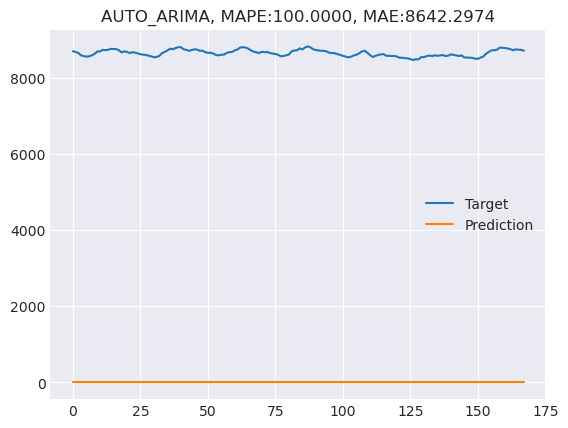

In [25]:
plt.title(f"AUTO_ARIMA, MAPE:{mape(prd2, tst):.4f}, MAE:{mae(prd2, tst):.4f}")
plt.plot(tst, label="Target")
plt.plot(prd2, label=f"Prediction")
plt.legend()
plt.show()